#**Object Detection Using YOLO Model**

##**Create Dataset using Pi Camera with Raspberry Pi**

###**Capture Images**

Connect Pi Camera to Raspberry Pi and using libcamera module, create a Python program as follows that captures *N (20)* images and execute it locally in Raspberry Pi OS.

In [ ]:
import os
import time

# Create the train folder if it doesn't exist
os.makedirs("train", exist_ok=True)

# Capture 20 images with a 2-second delay between each
for i in range(1, 21):
    filename = f"train/train{i}.jpg"
    os.system(f"libcamera-still -o {filename} --vflip --hflip")
    print(f"Captured {filename}")
    time.sleep(2)  # 2-second delay

Captured train/train1.jpg
Captured train/train2.jpg
Captured train/train3.jpg
Captured train/train4.jpg
Captured train/train5.jpg
Captured train/train6.jpg
Captured train/train7.jpg
Captured train/train8.jpg
Captured train/train9.jpg
Captured train/train10.jpg
Captured train/train11.jpg
Captured train/train12.jpg
Captured train/train13.jpg
Captured train/train14.jpg
Captured train/train15.jpg
Captured train/train16.jpg
Captured train/train17.jpg
Captured train/train18.jpg
Captured train/train19.jpg
Captured train/train20.jpg


###**Annotate and Split Images**
Login or create an account in Roboflow and create a project in order to create your Computer Vision project. Upload your images and create annotations with the appropriate label *(pen, in this case)*. Then create the train-validation-test split.

##**Download Dataset**

###**Download from Roboflow**
In the Roboflow project, go to *Versions -> Download Dataset*. In the dialog box, select *YOLOv5-Pytorch* and check *Show download code*. Select *Continue* and copy the code presented and paste below. Run the code to download and extract the dataset to the Colab Notebook.

In [ ]:
# Paste the download code here... It should look something like below

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")         # Enter your API-key
# project = rf.workspace("YOUR_WORKSPACE_ID").project("YOUR_PROJECT_ID")
# version = project.version(1)
# dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pen-1 in yolov5pytorch:: 100%|██████████| 64/64 [00:00<00:00, 5058.04it/s]


###**Make Changes in Dataset**
In the *data.yml* file, edit the lines 10 to 12 as follows:

```
10 test: ../test/images       -> test: /content/Pen-1/test/images
11 train: Pen-1/train/images  -> train: /content/Pen-1/train/images
12 val: Pen-1/valid/image     -> val: /content/Pen-1/valid/images
```

##**Download Ultralytics Repository**
The programs within the repository are required to create and train our custom model based on Ultralytics YOLOv5 parameters. We use the model creation tool of Ultralytics YOLOv5 and weights of pretrained YOLOv5s (small) model provided by Ultralytics.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r /content/yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 26.3 MB/s eta 0:00:00


##**Create Model**
The best.pt Pytorch model created is saved in *yolov5/runs/train/exp/weights/*.

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 100 --data /content/Pen-1/data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-05 12:15:10.762822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 12:15:10.781938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 12:15:10.787788: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

##**Get Predictions using Model**


###**Download Test Images**
Download the saved images from drive.

In [ ]:
import gdown
import zipfile
import os

# Replace 'FILE_ID' with your actual Google Drive file ID
file_id = "1Rcrb__YnadehGi5RzXePygiB_6HoG-En"
zip_path = "/content/folder.zip"  # Temporary path to save the zip file

# Construct the gdown download link
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/pred")  # Destination folder

# Clean up by removing the downloaded zip file
os.remove(zip_path)

print("Download and extraction complete.")

import shutil
import os

# Define the current directory containing images and the target directory
current_directory = "/content/pred/pred"
target_directory = "/content/pred"

# Check if the current directory exists
if os.path.exists(current_directory):
    # Move each file from the current directory to the target directory
    for file_name in os.listdir(current_directory):
        file_path = os.path.join(current_directory, file_name)
        if os.path.isfile(file_path):
            shutil.move(file_path, target_directory)

    # Optionally, delete the now-empty 'pred' subdirectory
    os.rmdir(current_directory)

print("Files moved successfully to", target_directory)

Downloading...
From: https://drive.google.com/uc?id=1Rcrb__YnadehGi5RzXePygiB_6HoG-En
To: /content/folder.zip
100%|██████████| 417k/417k [00:00<00:00, 108MB/s]

Download and extraction complete.
Files moved successfully to /content/pred


###**Run Model**
Run model on test images and get predictions of objects to be detected.

YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded


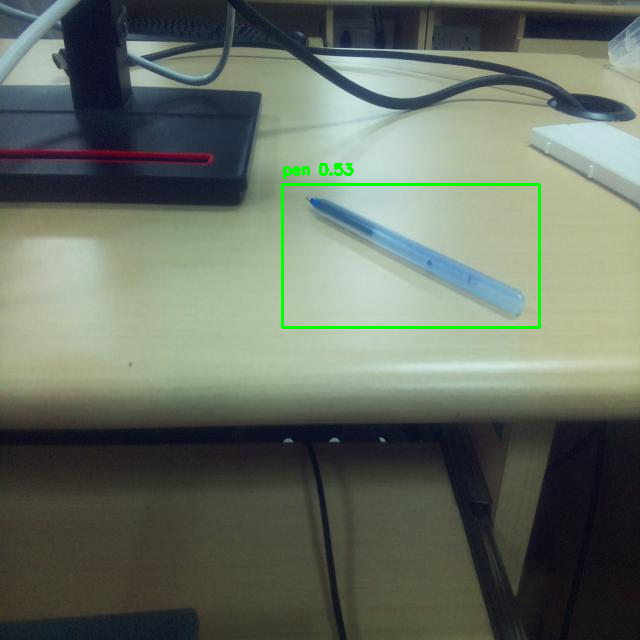

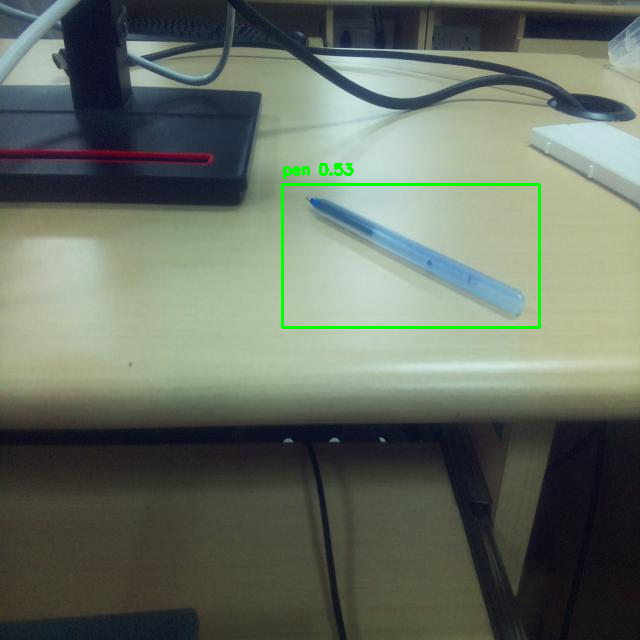

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


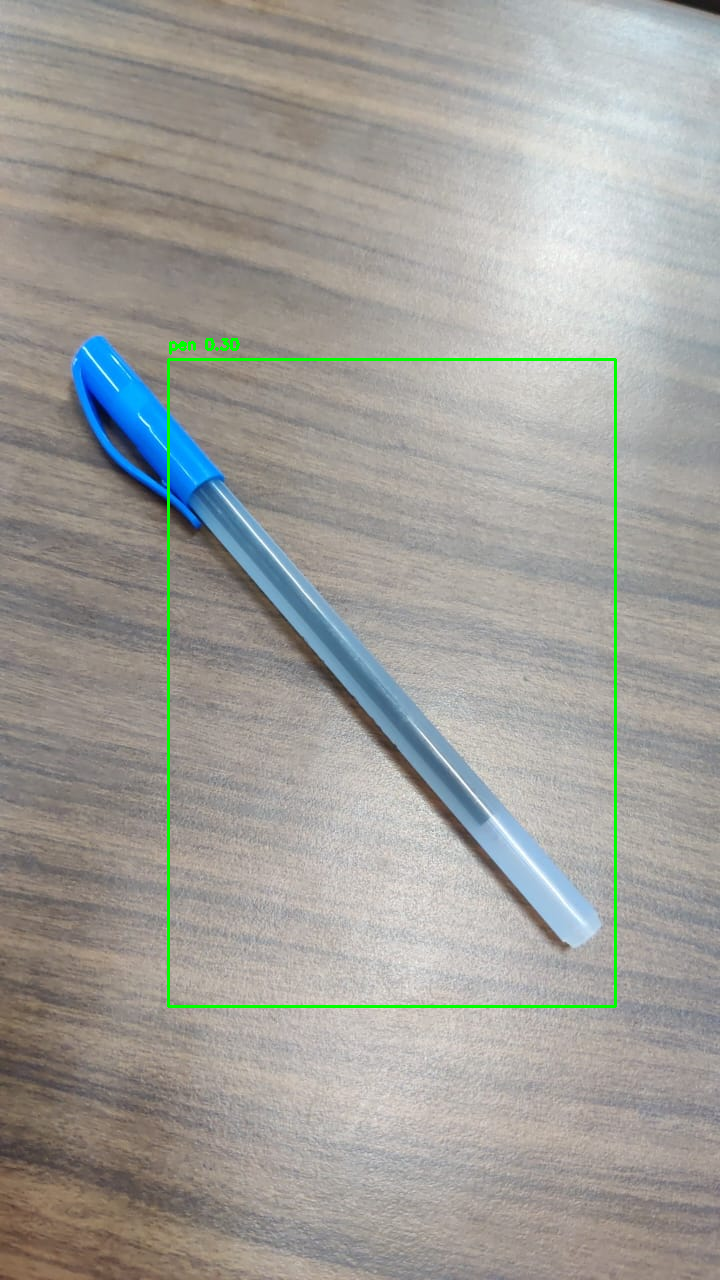

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


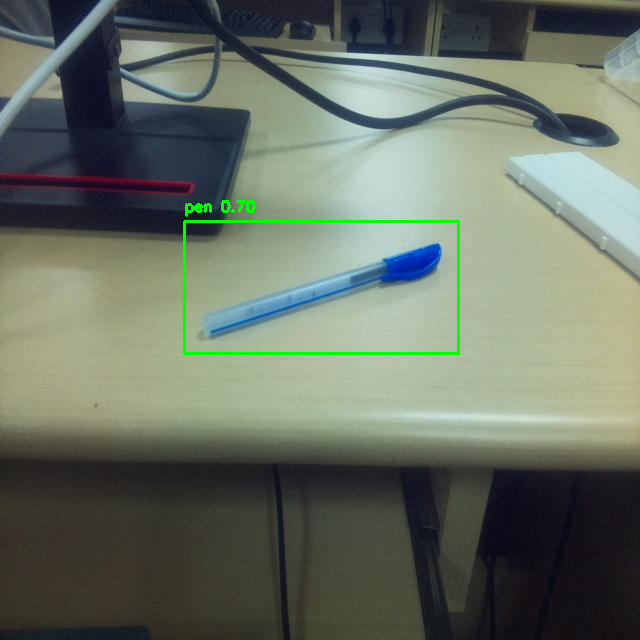

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


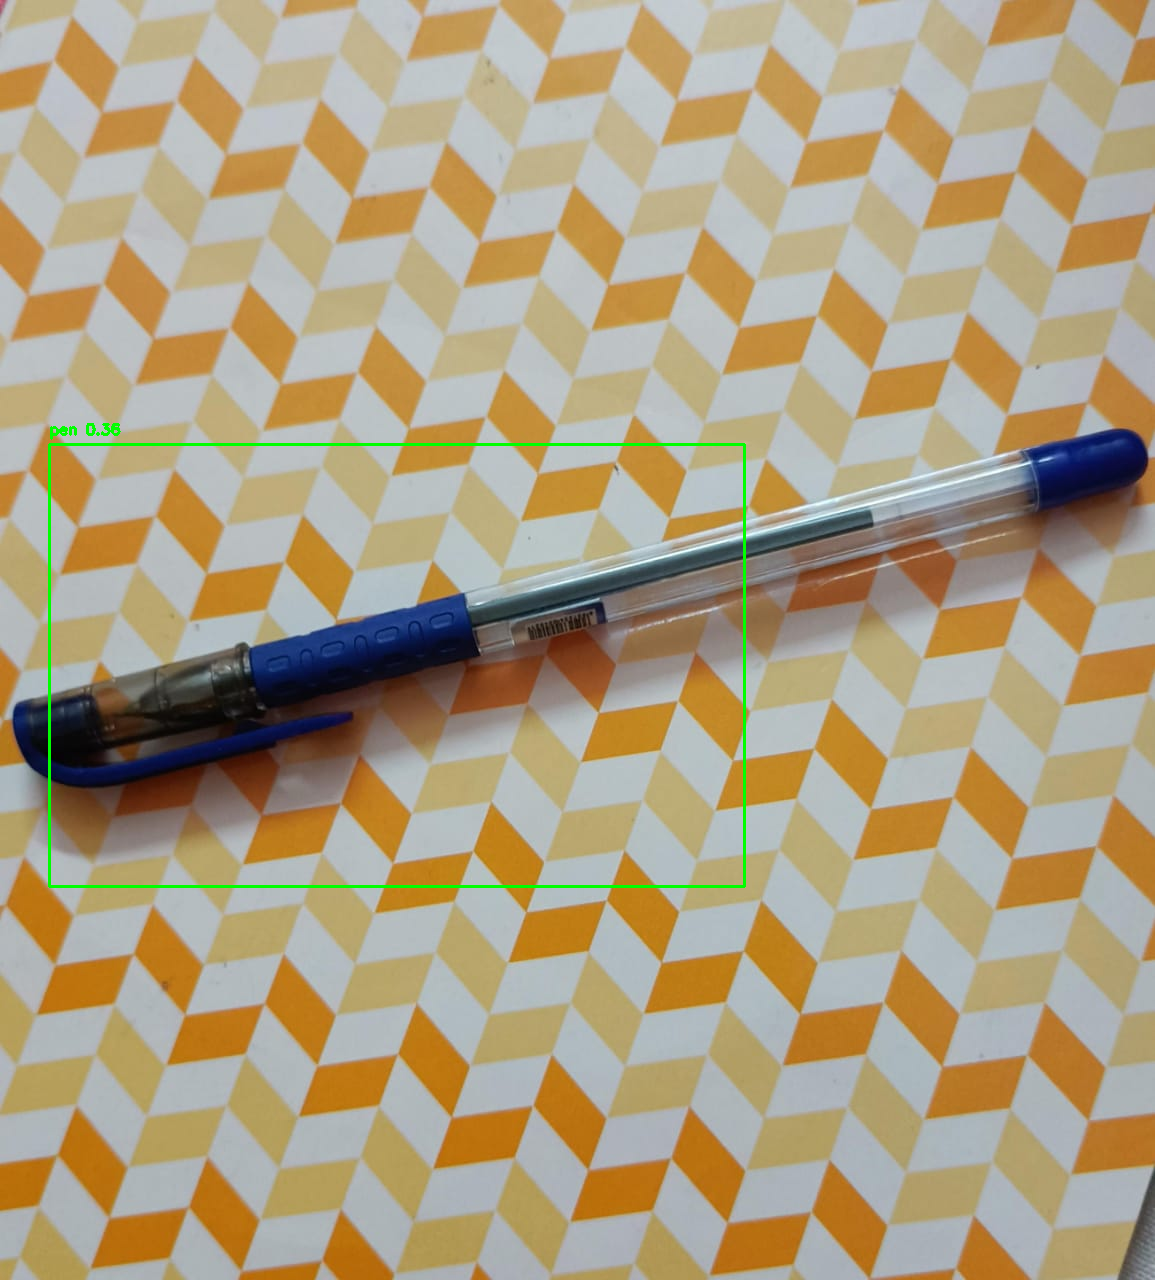

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


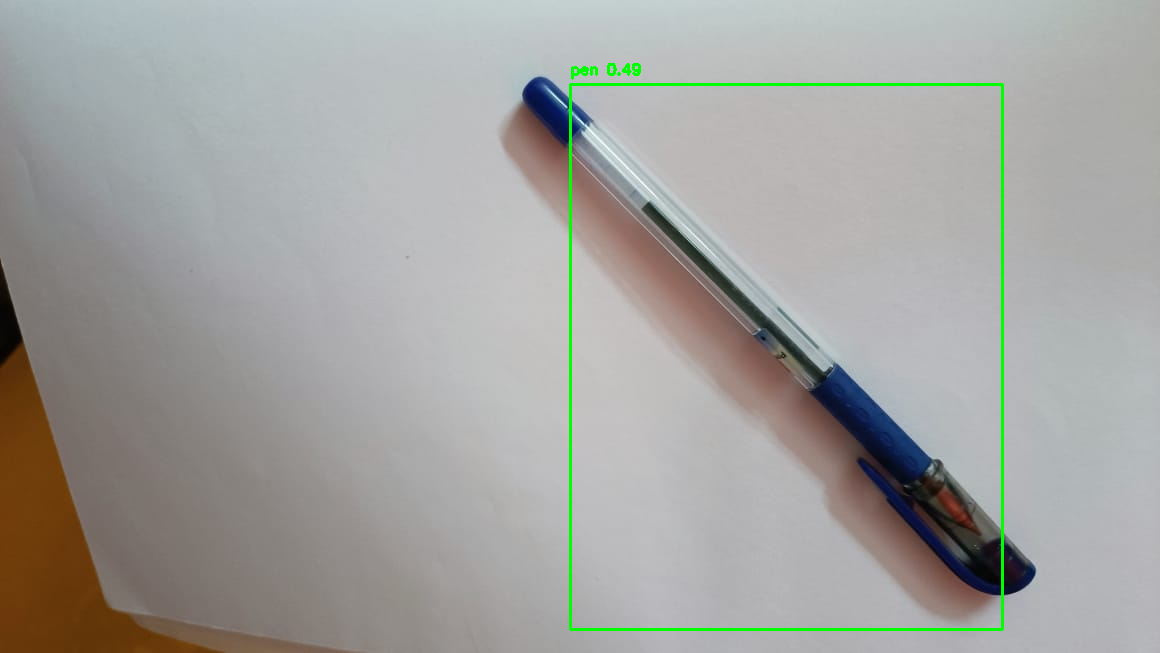

Images saved in /content/output/


In [ ]:
import torch
from pathlib import Path
import cv2
import os
from google.colab.patches import cv2_imshow

# Load the custom-trained model
model_path = '/content/yolov5/runs/train/exp/weights/best.pt'
model = torch.hub.load('/content/yolov5', 'custom', path=model_path, source='local')

# Define the test images folder and output folder
test_folder = '/content/pred/'
output_folder = '/content/output/'

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to save images with bounding boxes
def save_image_with_boxes(image_path, results, save_path):
    img = cv2.imread(image_path)  # read image

    # Get detection results
    boxes = results.pandas().xyxy[0]  # bounding boxes with labels

    for _, row in boxes.iterrows():
        x1, y1, x2, y2, conf, cls = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']), row['confidence'], row['name']
        label = f"{cls} {conf:.2f}"

        if (conf >= 0.3):
            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Add label
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cv2_imshow(img)

    # Save the image with bounding boxes
    cv2.imwrite(save_path, img)

# Run inference on each image in the test folder
for image_path in Path(test_folder).glob('*.jpg'):  # Adjust extension if needed
    results = model(str(image_path))  # Inference
    output_path = os.path.join(output_folder, Path(image_path).name)
    save_image_with_boxes(str(image_path), results, output_path)

print(f"Images saved in {output_folder}")